In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [21]:
# Fetch the Glass Identification dataset
print("Loading Glass Identification dataset...")
glass = fetch_ucirepo(id=42)
X = glass.data.features
y = glass.data.targets.values.ravel()

# Display dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Feature names: {list(glass.data.features.columns)}")
print(f"Class distribution:\n{pd.Series(y).value_counts().sort_index()}")

Loading Glass Identification dataset...
Dataset shape: (214, 9)
Number of classes: 6
Feature names: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Class distribution:
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64


In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 149
Testing set size: 65


In [23]:
# Define range of min_samples_split values to test
min_samples_split_values = [2, 3, 5, 10, 15, 20, 25, 30, 40, 50]
train_scores = []
test_scores = []
cv_scores = []
tree_depths = []
num_nodes = []

In [24]:
print("\nTraining Decision Trees with different min_samples_split values...")

for min_split in min_samples_split_values:
    # Create and train Decision Tree classifier
    dt = DecisionTreeClassifier(
        min_samples_split=min_split,
        random_state=42
    )
    
    # Train the model
    dt.fit(X_train, y_train)
    
    # Calculate training and test accuracy
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Calculate cross-validation score (5-fold)
    cv_accuracy = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Store metrics
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    cv_scores.append(cv_accuracy)
    tree_depths.append(dt.get_depth())
    num_nodes.append(dt.tree_.node_count)
    
    print(f"min_samples_split={min_split:2d}: "
          f"Train Acc={train_accuracy:.4f}, "
          f"Test Acc={test_accuracy:.4f}, "
          f"CV Acc={cv_accuracy:.4f}, "
          f"Depth={dt.get_depth():2d}, "
          f"Nodes={dt.tree_.node_count:3d}")


Training Decision Trees with different min_samples_split values...
min_samples_split= 2: Train Acc=1.0000, Test Acc=0.7385, CV Acc=0.6513, Depth=11, Nodes= 75
min_samples_split= 3: Train Acc=0.9732, Test Acc=0.7692, CV Acc=0.6648, Depth=11, Nodes= 67
min_samples_split= 5: Train Acc=0.9329, Test Acc=0.7231, CV Acc=0.6913, Depth=10, Nodes= 55
min_samples_split=10: Train Acc=0.8591, Test Acc=0.6923, CV Acc=0.6648, Depth=10, Nodes= 39
min_samples_split=15: Train Acc=0.7718, Test Acc=0.6308, CV Acc=0.6377, Depth=10, Nodes= 31
min_samples_split=20: Train Acc=0.7651, Test Acc=0.6308, CV Acc=0.6310, Depth=10, Nodes= 29
min_samples_split=25: Train Acc=0.7651, Test Acc=0.6308, CV Acc=0.6446, Depth=10, Nodes= 27
min_samples_split=30: Train Acc=0.7651, Test Acc=0.6308, CV Acc=0.6446, Depth=10, Nodes= 27
min_samples_split=40: Train Acc=0.7584, Test Acc=0.7077, CV Acc=0.6246, Depth= 7, Nodes= 17
min_samples_split=50: Train Acc=0.7517, Test Acc=0.7077, CV Acc=0.5839, Depth= 6, Nodes= 15


In [25]:
# Find the best performing model
best_idx = np.argmax(test_scores)
best_min_split = min_samples_split_values[best_idx]
best_test_score = test_scores[best_idx]

print(f"\nBest model: min_samples_split={best_min_split}, Test Accuracy={best_test_score:.4f}")


Best model: min_samples_split=3, Test Accuracy=0.7692


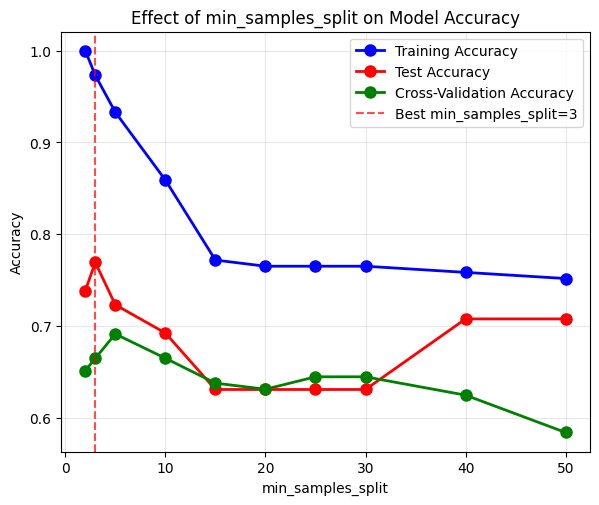

In [26]:
# Create visualization
plt.figure(figsize=(15, 12))

# Plot 1: Accuracy vs min_samples_split
plt.subplot(2, 2, 1)
plt.plot(min_samples_split_values, train_scores, 'bo-', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(min_samples_split_values, test_scores, 'ro-', label='Test Accuracy', linewidth=2, markersize=8)
plt.plot(min_samples_split_values, cv_scores, 'go-', label='Cross-Validation Accuracy', linewidth=2, markersize=8)
plt.axvline(x=best_min_split, color='red', linestyle='--', alpha=0.7, label=f'Best min_samples_split={best_min_split}')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on Model Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

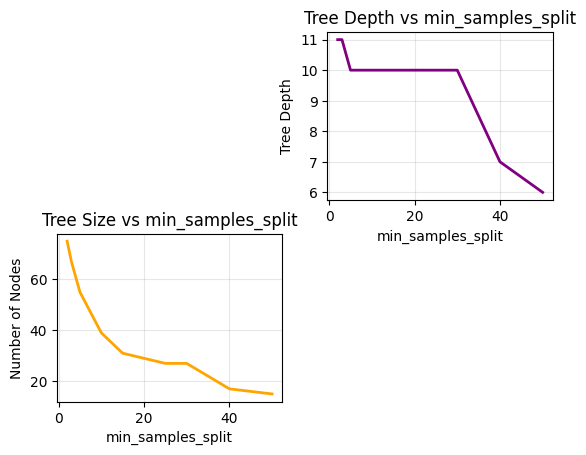

In [27]:
# Plot 2: Tree complexity metrics
plt.subplot(2, 2, 2)
plt.plot(min_samples_split_values, tree_depths, 'purple', linewidth=2, markersize=8)
plt.xlabel('min_samples_split')
plt.ylabel('Tree Depth')
plt.title('Tree Depth vs min_samples_split')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(min_samples_split_values, num_nodes, 'orange', linewidth=2, markersize=8)
plt.xlabel('min_samples_split')
plt.ylabel('Number of Nodes')
plt.title('Tree Size vs min_samples_split')
plt.grid(True, alpha=0.3)

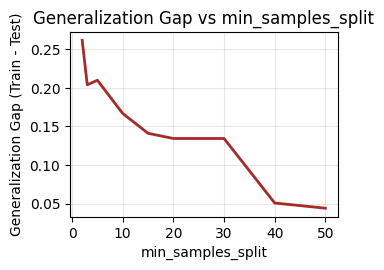

In [28]:
# Plot 3: Generalization gap
plt.subplot(2, 2, 4)
generalization_gap = [train_scores[i] - test_scores[i] for i in range(len(train_scores))]
plt.plot(min_samples_split_values, generalization_gap, 'brown', linewidth=2, markersize=8)
plt.xlabel('min_samples_split')
plt.ylabel('Generalization Gap (Train - Test)')
plt.title('Generalization Gap vs min_samples_split')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# Train the best model for detailed analysis
best_dt = DecisionTreeClassifier(min_samples_split=best_min_split, random_state=42)
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)

In [30]:
# Display detailed performance metrics
print("\n" + "="*60)
print("DETAILED PERFORMANCE ANALYSIS")
print("="*60)

print(f"\nBest Model Configuration:")
print(f"min_samples_split: {best_min_split}")
print(f"Training Accuracy: {accuracy_score(y_train, best_dt.predict(X_train)):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Tree Depth: {best_dt.get_depth()}")
print(f"Number of Nodes: {best_dt.tree_.node_count}")


DETAILED PERFORMANCE ANALYSIS

Best Model Configuration:
min_samples_split: 3
Training Accuracy: 0.9732
Test Accuracy: 0.7692
Tree Depth: 11
Number of Nodes: 67



Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.90      0.84        21
           2       0.83      0.65      0.73        23
           3       0.33      0.40      0.36         5
           5       0.75      0.75      0.75         4
           6       0.67      0.67      0.67         3
           7       0.90      1.00      0.95         9

    accuracy                           0.77        65
   macro avg       0.71      0.73      0.72        65
weighted avg       0.78      0.77      0.77        65



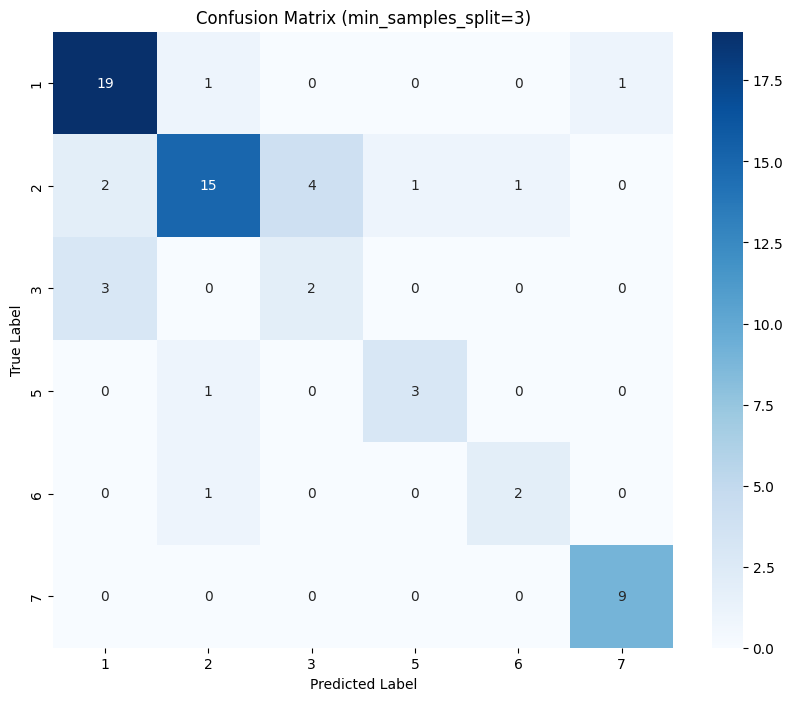

In [31]:
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix (min_samples_split={best_min_split})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Feature Importance:
  Feature  Importance
7      Ba    0.162206
2      Mg    0.146165
4      Si    0.134059
3      Al    0.131597
1      Na    0.115754
0      RI    0.113546
6      Ca    0.078172
5       K    0.070774
8      Fe    0.047728


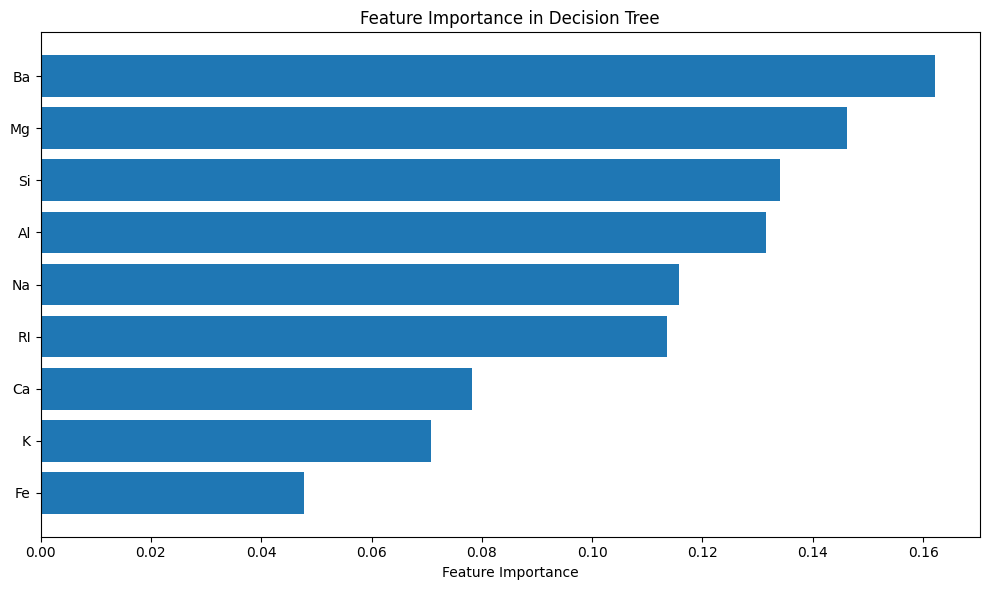

In [32]:
# Feature importance analysis
feature_importance = best_dt.feature_importances_
feature_names = glass.data.features.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [33]:
# Summary table of all experiments
results_df = pd.DataFrame({
    'min_samples_split': min_samples_split_values,
    'Training_Accuracy': train_scores,
    'Test_Accuracy': test_scores,
    'CV_Accuracy': cv_scores,
    'Tree_Depth': tree_depths,
    'Num_Nodes': num_nodes,
    'Generalization_Gap': generalization_gap
})

print("\nSummary Table:")
print(results_df.round(4))


Summary Table:
   min_samples_split  Training_Accuracy  Test_Accuracy  CV_Accuracy  \
0                  2             1.0000         0.7385       0.6513   
1                  3             0.9732         0.7692       0.6648   
2                  5             0.9329         0.7231       0.6913   
3                 10             0.8591         0.6923       0.6648   
4                 15             0.7718         0.6308       0.6377   
5                 20             0.7651         0.6308       0.6310   
6                 25             0.7651         0.6308       0.6446   
7                 30             0.7651         0.6308       0.6446   
8                 40             0.7584         0.7077       0.6246   
9                 50             0.7517         0.7077       0.5839   

   Tree_Depth  Num_Nodes  Generalization_Gap  
0          11         75              0.2615  
1          11         67              0.2039  
2          10         55              0.2098  
3          10 

In [34]:
# Analysis and interpretation
print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)

print("\n1. UNDERFITTING vs OVERFITTING ANALYSIS:")
print(f"   - Lowest min_samples_split (2):")
print(f"     Training Accuracy: {train_scores[0]:.4f}, Test Accuracy: {test_scores[0]:.4f}")
print(f"     Generalization Gap: {generalization_gap[0]:.4f}")

print(f"\n   - Highest min_samples_split ({min_samples_split_values[-1]}):")
print(f"     Training Accuracy: {train_scores[-1]:.4f}, Test Accuracy: {test_scores[-1]:.4f}")
print(f"     Generalization Gap: {generalization_gap[-1]:.4f}")

print(f"\n2. OPTIMAL RANGE OBSERVATION:")
print(f"   - Best min_samples_split value: {best_min_split}")
print(f"   - Corresponding test accuracy: {best_test_score:.4f}")

print(f"\n3. TREE COMPLEXITY TRENDS:")
print(f"   - Tree depth decreases from {tree_depths[0]} to {tree_depths[-1]}")
print(f"   - Number of nodes decreases from {num_nodes[0]} to {num_nodes[-1]}")


KEY INSIGHTS

1. UNDERFITTING vs OVERFITTING ANALYSIS:
   - Lowest min_samples_split (2):
     Training Accuracy: 1.0000, Test Accuracy: 0.7385
     Generalization Gap: 0.2615

   - Highest min_samples_split (50):
     Training Accuracy: 0.7517, Test Accuracy: 0.7077
     Generalization Gap: 0.0440

2. OPTIMAL RANGE OBSERVATION:
   - Best min_samples_split value: 3
   - Corresponding test accuracy: 0.7692

3. TREE COMPLEXITY TRENDS:
   - Tree depth decreases from 11 to 6
   - Number of nodes decreases from 75 to 15
